# SMALL MWE

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import os
import sys
base_dir = os.path.join(os.getcwd(), os.pardir, os.pardir)
sys.path.append(base_dir)

# Models
import Models.LatentFactorModels 
import Simulators.Simulator 
import Models.ModelComparer 
import numpy as np
import sklearn

import pandas as pd
pd.set_option('max_rows', 15)
import seaborn as sns

# Assessment Machinery
eval_base_dir = os.path.join(base_dir, os.pardir, "CancerDimensionalityReduction")
sys.path.append(eval_base_dir)

import Performance.classification.CrossValidation 

# Logging
import logging
logging.basicConfig(stream=sys.stdout, level=logging.WARNING)

# Data
import Data.parse_CGP

/home/ijoseph/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
import datetime
start_time = datetime.datetime.now()
print "Starting at", start_time

Starting at 2016-11-23 19:32:24.153236


# Set Up DataFrameCollection

In [4]:
dfc = Performance.classification.CrossValidation.DataFrameCollection.from_directory("Erlotinib")

## Subsampling

In [5]:
dfc = dfc.down_sample(100)

In [6]:
print dfc.num_columns_of_low_variance(), dfc.num_missing_values()

0 0


In [7]:
(dfc.independentDF.dtypes == 'float64').all()

True

# Cross Validation

In [8]:
(m, p_0, p_3) = (2,3,1)
#p_1, p_2 = dfc.indIndices[0], dfc.independentDF.shape[1] - sum(dfc.indIndices)
p_1, p_2 = 50,50

In [9]:
cv_mfaa = Performance.classification.CrossValidation.CrossValidation(
    predictorClass=Models.LatentFactorModels.ThreeNodeGaussianModel(m, p_0, p_1, p_2, p_3),
                                                         dataFrameCollection=dfc,k =10)

cv_mfaa.cross_validate()

Replacing zero eigenvalues with 1 if diagonal Ψ, else identity.
Replacing zero eigenvalues with 1 if diagonal Ψ, else identity.
Replacing zero eigenvalues with 1 if diagonal Ψ, else identity.
Replacing zero eigenvalues with 1 if diagonal Ψ, else identity.
Replacing zero eigenvalues with 1 if diagonal Ψ, else identity.
Replacing zero eigenvalues with 1 if diagonal Ψ, else identity.
Replacing zero eigenvalues with 1 if diagonal Ψ, else identity.
Replacing zero eigenvalues with 1 if diagonal Ψ, else identity.
Replacing zero eigenvalues with 1 if diagonal Ψ, else identity.
Replacing zero eigenvalues with 1 if diagonal Ψ, else identity.
Replacing zero eigenvalues with 1 if diagonal Ψ, else identity.
Replacing zero eigenvalues with 1 if diagonal Ψ, else identity.
Replacing zero eigenvalues with 1 if diagonal Ψ, else identity.
Replacing zero eigenvalues with 1 if diagonal Ψ, else identity.
Replacing zero eigenvalues with 1 if diagonal Ψ, else identity.
Replacing zero eigenvalues with 1 if dia

/home/ijoseph/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Replacing zero eigenvalues with 1 if diagonal Ψ, else identity.
Replacing zero eigenvalues with 1 if diagonal Ψ, else identity.
Replacing zero eigenvalues with 1 if diagonal Ψ, else identity.
Replacing zero eigenvalues with 1 if diagonal Ψ, else identity.
Replacing zero eigenvalues with 1 if diagonal Ψ, else identity.
Replacing zero eigenvalues with 1 if diagonal Ψ, else identity.
Replacing zero eigenvalues with 1 if diagonal Ψ, else identity.
Replacing zero eigenvalues with 1 if diagonal Ψ, else identity.
Replacing zero eigenvalues with 1 if diagonal Ψ, else identity.
Replacing zero eigenvalues with 1 if diagonal Ψ, else identity.
Replacing zero eigenvalues with 1 if diagonal Ψ, else identity.
Replacing zero eigenvalues with 1 if diagonal Ψ, else identity.
Replacing zero eigenvalues with 1 if diagonal Ψ, else identity.
Replacing zero eigenvalues with 1 if diagonal Ψ, else identity.
Replacing zero eigenvalues with 1 if diagonal Ψ, else identity.
Replacing zero eigenvalues with 1 if dia

mean accuracy score 0.77, standard error 0.14
mean sensitivity 0.00, standard error 0.00
mean specificity 0.87, standard error 0.30
mean precision 0.00, standard error 0.00


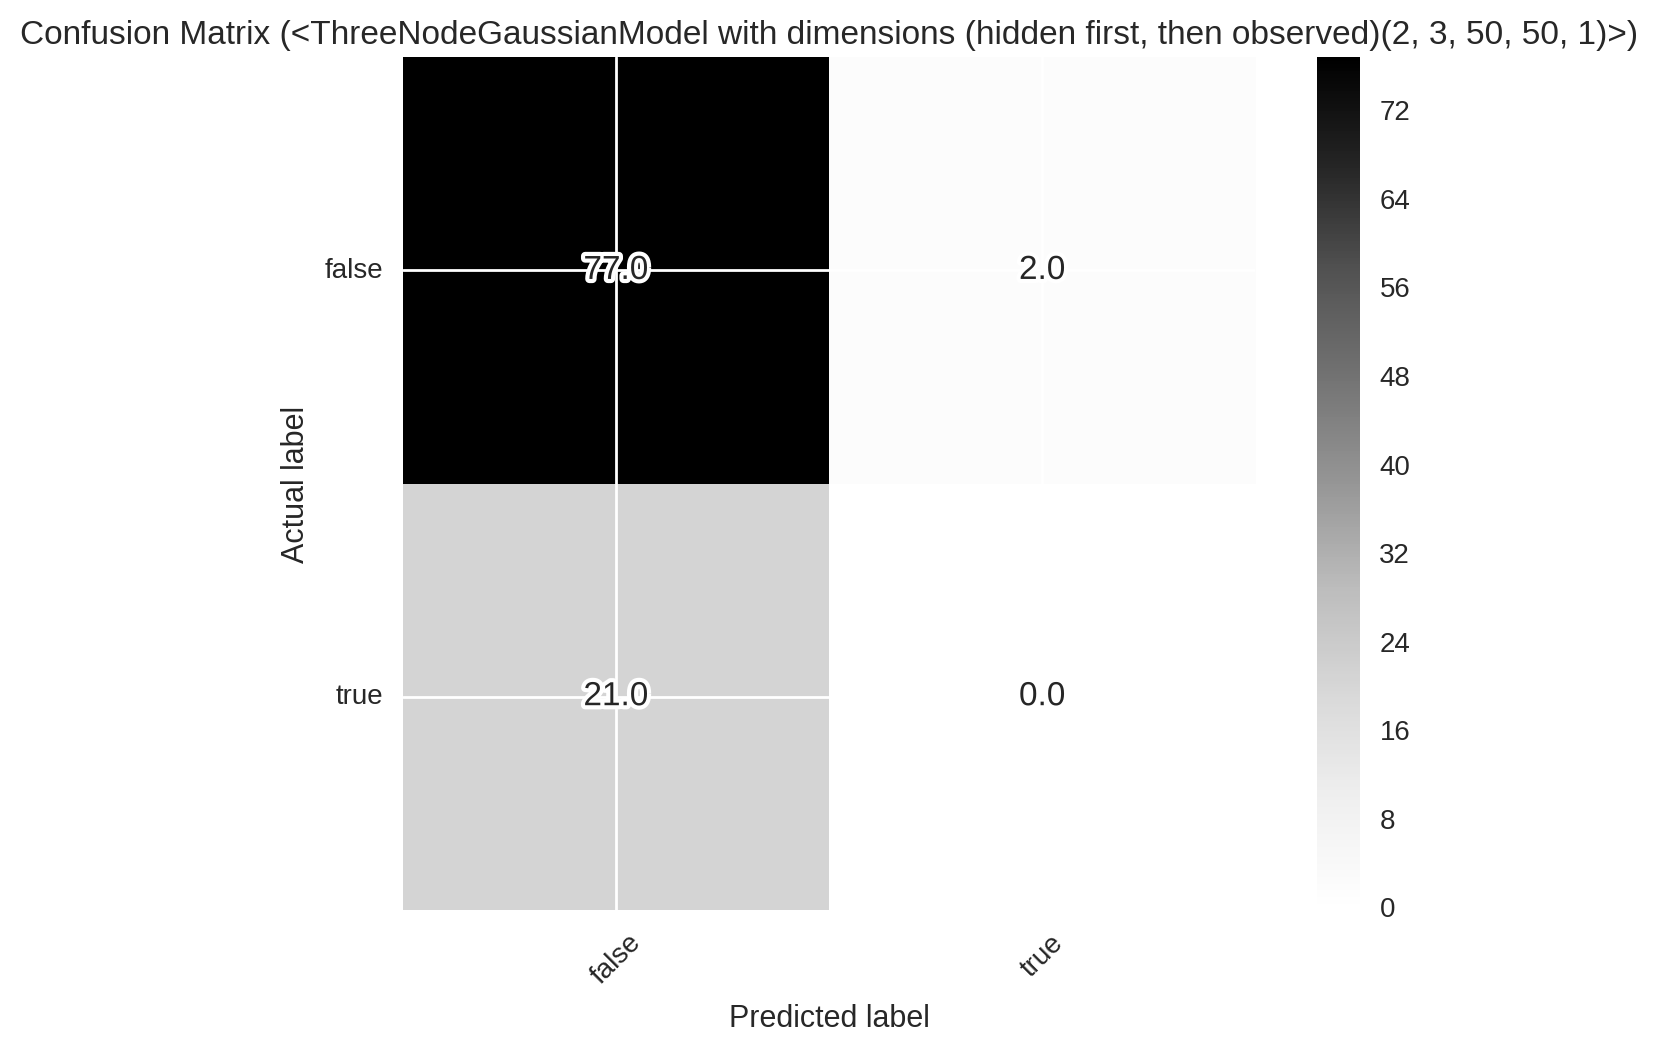

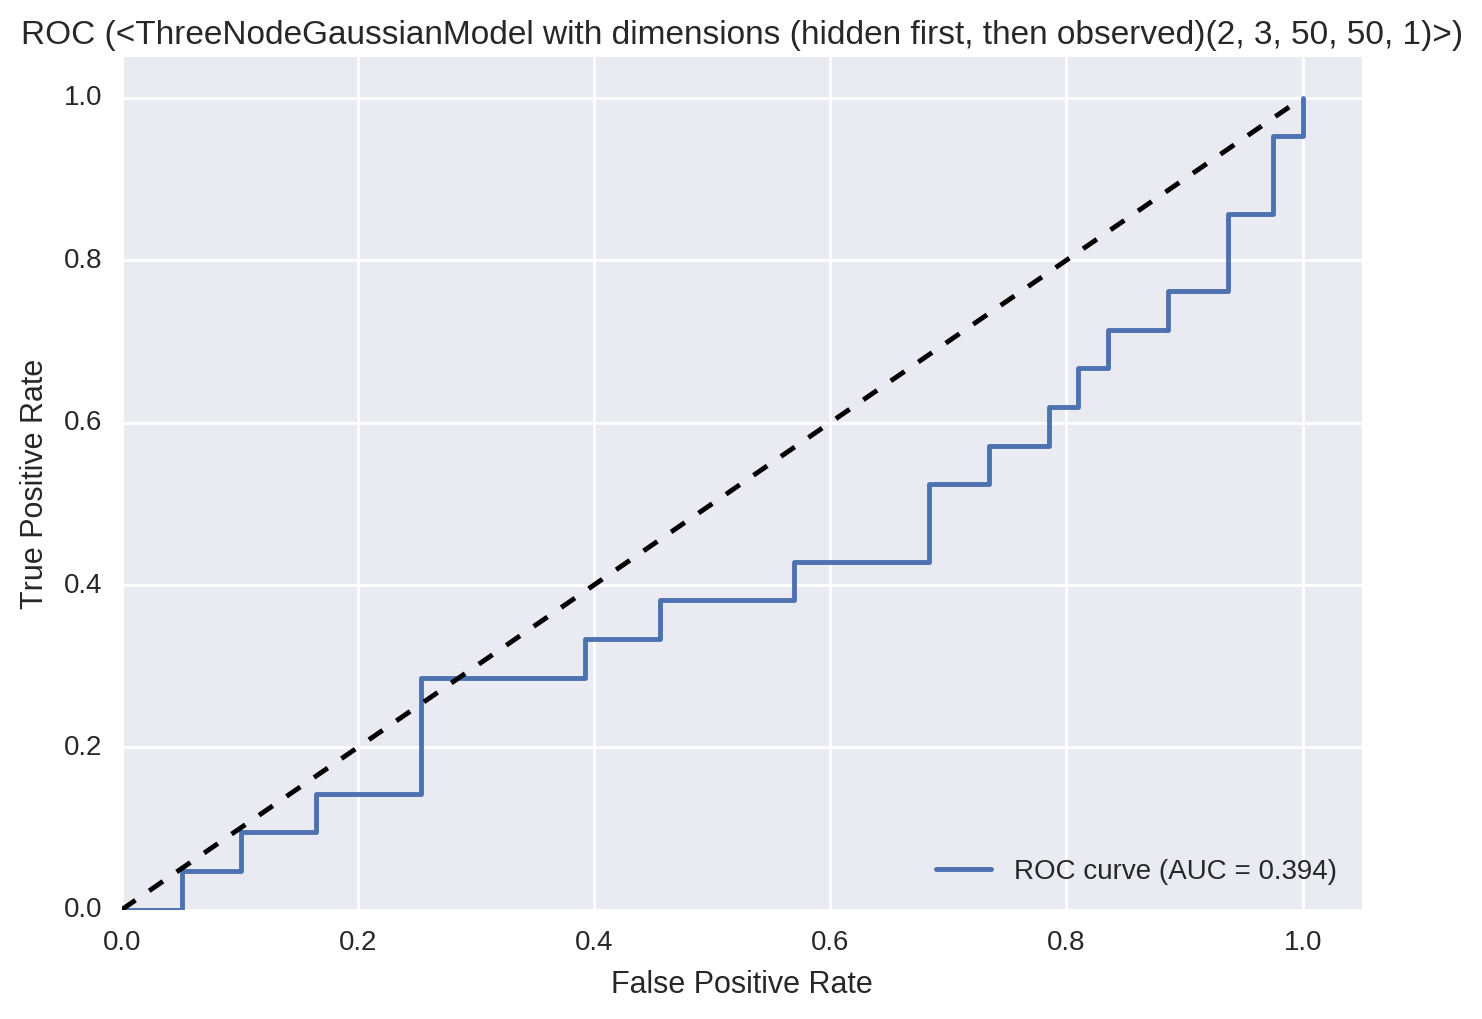

(<matplotlib.figure.Figure at 0x7fa650477f90>,
 <matplotlib.figure.Figure at 0x7fa650a00ed0>)

In [10]:
cv_mfaa.output_results()

In [11]:
stop_time = datetime.datetime.now()

In [12]:
print "Stopped at", stop_time, "Elapsed (h:m:s)", stop_time - start_time

Stopped at 2016-11-23 19:32:31.283591 Elapsed (h:m:s) 0:00:07.130355


# Logistic Regression

In [13]:
cv = Performance.classification.CrossValidation.CrossValidation(sklearn.linear_model.LogisticRegression()
                                                    , dfc , 10)
cv.cross_validate()


/home/ijoseph/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


mean accuracy score 0.72, standard error 0.11
mean sensitivity 0.24, standard error 0.34
mean specificity 0.83, standard error 0.13
mean precision 0.18, standard error 0.24


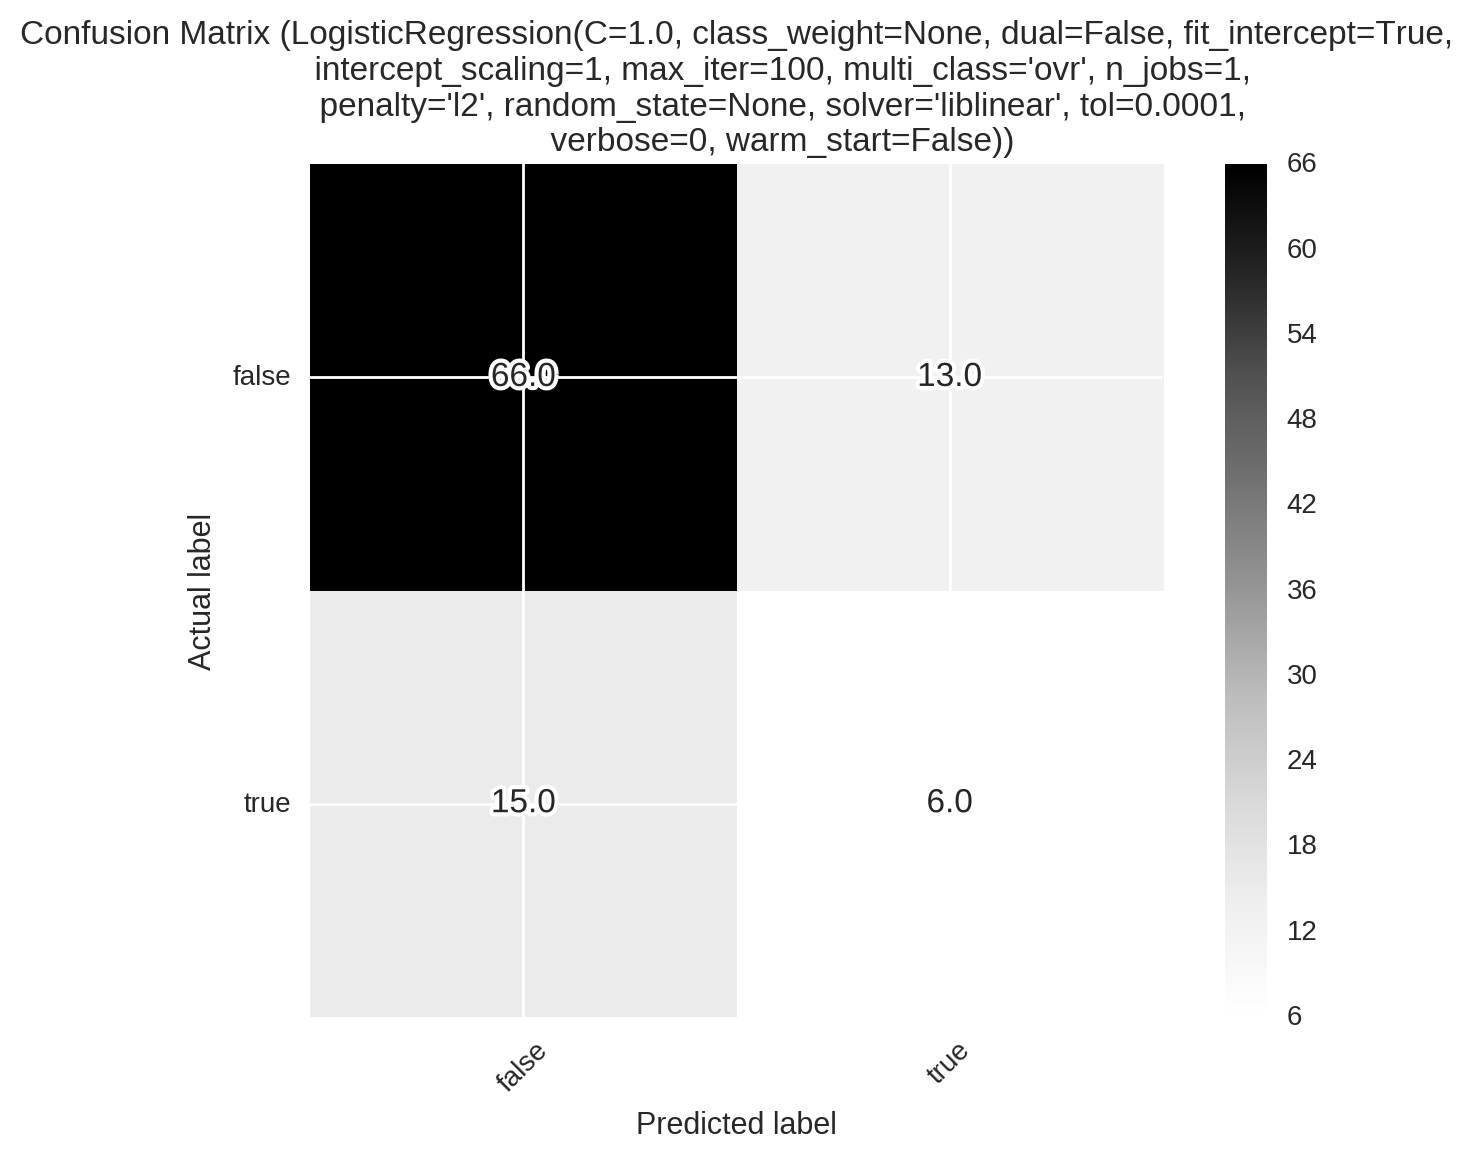

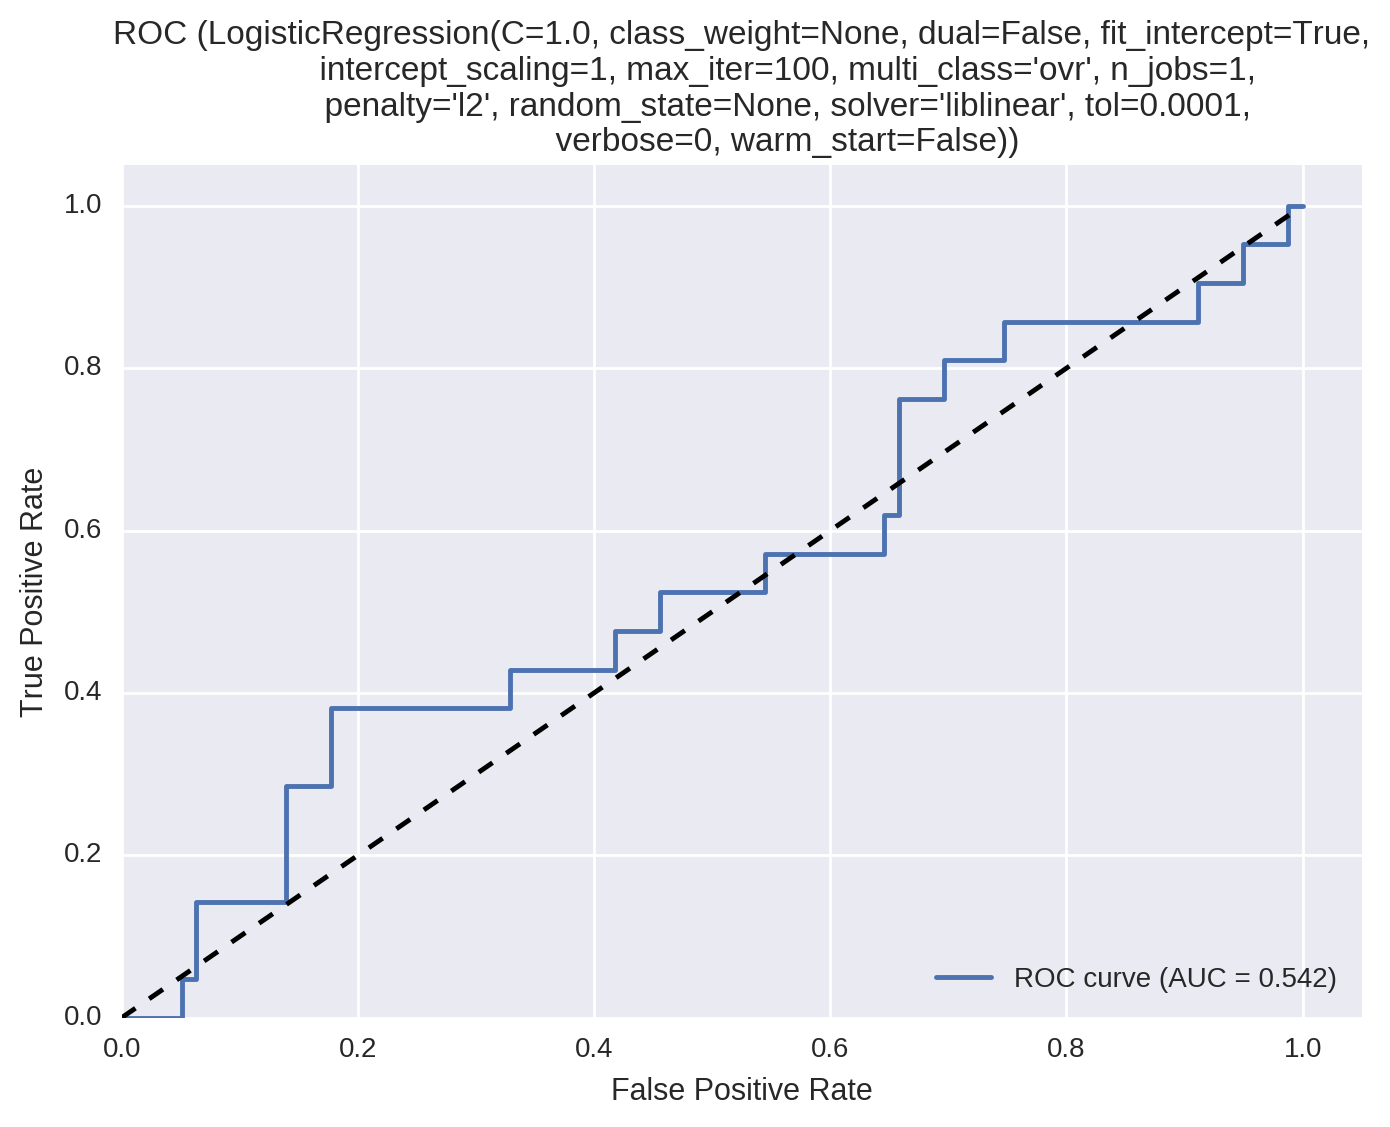

(<matplotlib.figure.Figure at 0x7fa6504183d0>,
 <matplotlib.figure.Figure at 0x7fa6503f71d0>)

In [14]:
cv.output_results()

In [15]:
stop_time = datetime.datetime.now()
print "Stopped at", stop_time, "Elapsed (h:m:s)", stop_time - start_time

Stopped at 2016-11-23 19:32:34.180174 Elapsed (h:m:s) 0:00:10.026938


Logistic Regression is pretty bad at this. NVM it's better with 100 downsampling